In [1]:
import plotly.express as px
# ^^^ pyforest auto-imports - don't write above this line
import plotly.express as px
import pandas as pd
import numpy as np

In [60]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [185]:
data = pd.read_csv('Crop_recommendation.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [3]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [5]:
data['label'].value_counts()

maize          100
mango          100
pigeonpeas     100
mothbeans      100
pomegranate    100
coconut        100
papaya         100
kidneybeans    100
orange         100
watermelon     100
banana         100
coffee         100
grapes         100
chickpea       100
apple          100
lentil         100
jute           100
mungbean       100
blackgram      100
cotton         100
rice           100
muskmelon      100
Name: label, dtype: int64

### Process

In [186]:
data.rename(columns={'N':'nitrogen','P':'phosphorus','K':'potassium'}, inplace=True)

In [5]:
data.isnull().sum()

nitrogen       0
phosphorus     0
potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
data_copy = data.round()

In [187]:
label_map = {j:i for i,j in enumerate(data['label'].unique())}

In [9]:
data_copy['label'] = data['label'].replace(label_map)

In [ ]:
data['size_bn']= pd.cut(data['size'],bins = 6,labels = np.arange(6))
data['size_bn'] = data['size_bn'].astype('int')

In [ ]:
data_copy['potassium_bin'] = pd.cut(data_copy['potassium'],bins = 20)
data_copy['potassium_bin'] = data_copy['potassium_bin'].apply(lambda x : str(x))

In [ ]:
data_copy['phosphorus_bin'] = pd.cut(data_copy['phosphorus'],bins = 7)
data_copy['phosphorus_bin'] = data_copy['phosphorus_bin'].apply(lambda x : str(x))

In [ ]:
data_copy['nitrogen_bin'] = pd.cut(data_copy['nitrogen'],bins = 7)
data_copy['nitrogen_bin'] = data_copy['nitrogen_bin'].apply(lambda x : str(x))

In [ ]:
data_copy['humidity_bin'] = pd.cut(data_copy['humidity'],bins = 8)
data_copy['humidity_bin'] = data_copy['humidity_bin'].apply(lambda x : str(x))

In [ ]:
data_copy['temperature_bin'] = pd.cut(data_copy['temperature'],bins = 7)
data_copy['temperature_bin'] = data_copy['temperature_bin'].apply(lambda x : str(x))

In [ ]:
data_copy['rainfall_bin'] = pd.cut(data_copy['rainfall'],bins = 9)
data_copy['rainfall_bin'] = data_copy['rainfall_bin'].apply(lambda x : str(x))

In [ ]:
data_copy['label_'] = data['label']

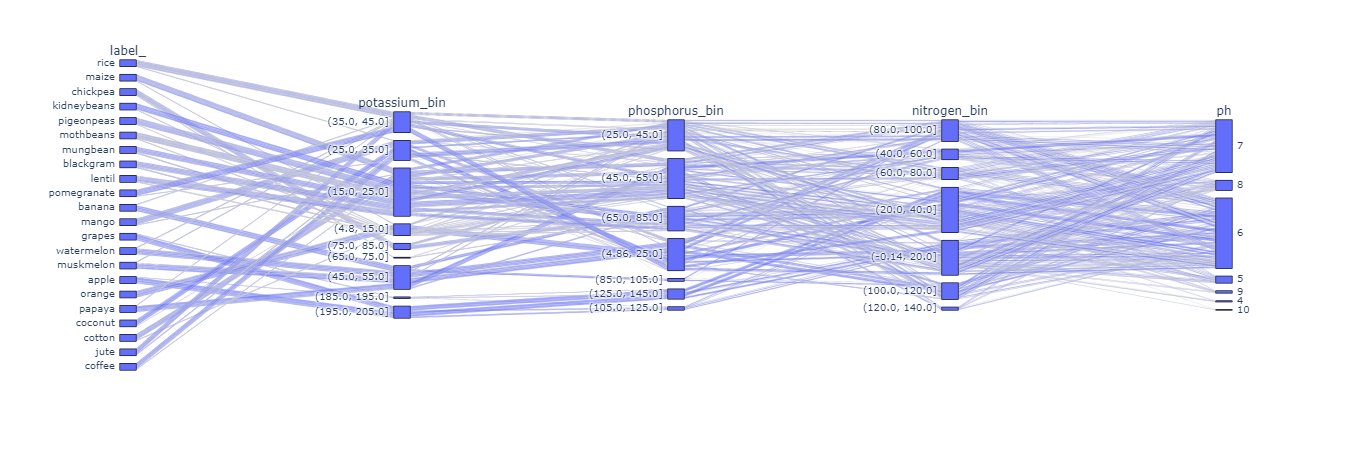

In [275]:
fig = px.parallel_categories(data_copy[['label_','potassium_bin','phosphorus_bin','nitrogen_bin','ph']],color_continuous_scale= px.colors.sequential.Inferno)
fig.show()


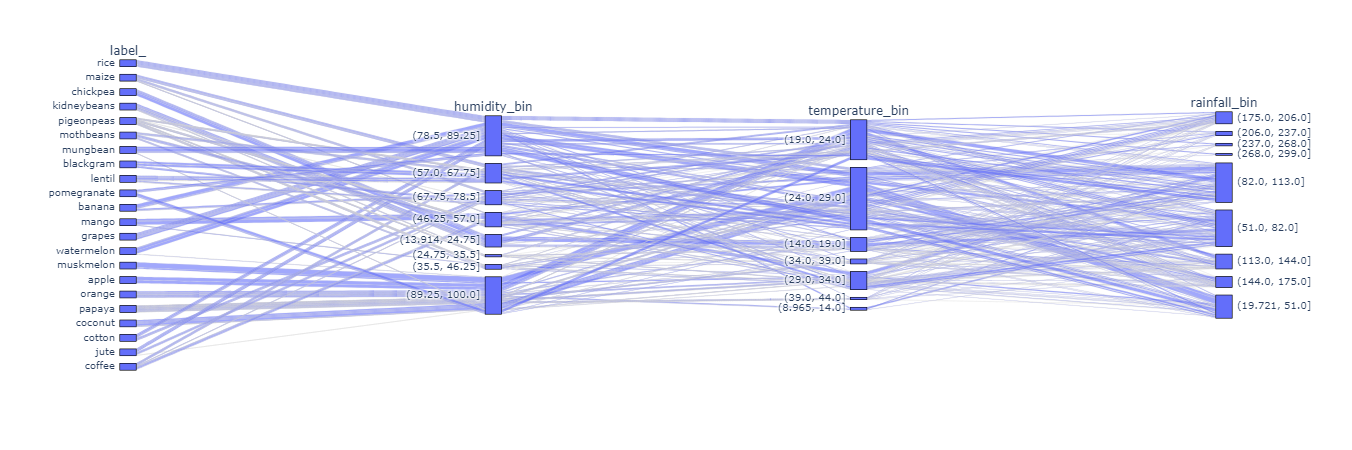

In [358]:
fig = px.parallel_categories(data_copy[['label_','humidity_bin','temperature_bin','rainfall_bin']])
fig.show()


In [478]:
y = data.round().groupby('label').agg((['min', 'max']))
y

nitrogen      phosphorus      potassium      temperature        \
                 min  max        min  max       min  max         min   max   
label                                                                        
apple              0   40        120  145       195  205        21.0  24.0   
banana            80  120         70   95        45   55        25.0  30.0   
blackgram         20   60         55   80        15   25        25.0  35.0   
chickpea          20   60         55   80        75   85        17.0  21.0   
coconut            0   40          5   30        25   35        25.0  30.0   
coffee            80  120         15   40        25   35        23.0  28.0   
cotton           100  140         35   60        15   25        22.0  26.0   
grapes             0   40        120  145       195  205         9.0  42.0   
jute              60  100         35   60        35   45        23.0  27.0   
kidneybeans        0   40         55   80        15   25        15.0  25.0   
lentil             0   40         55   80        15   25        18.0  30.0   
maize             60  100         35   60        15   25        18.0  27.0   
mango              0   40         15   40        25   35        27.0  36.0   
mothbeans          0   40         35   60        15   25        24.0  32.0   
mungbean           0   40         35   60        15   25        27.0  30.0   
muskmelon         80  120          5   30        45   55        27.0  30.0   
orange             0   40          5   30         5   15        10.0  35.0   
papaya            31   70         46   70        45   55        23.0  44.0   
pigeonpeas         0   40         55   80        15   25        18.0  37.0   
pomegranate        0   40          5   30        35   45        18.0  25.0   
rice              60   99         35   60        35   45        20.0  27.0   
watermelon        80  120          5   30        45   55        24.0  27.0   

            humidity          ph       rainfall         
                 min    max  min   max      min    max  
label                                                   
apple           90.0   95.0  6.0   6.0    100.0  125.0  
banana          75.0   85.0  6.0   6.0     90.0  120.0  
blackgram       60.0   70.0  7.0   8.0     60.0   75.0  
chickpea        14.0   20.0  6.0   9.0     65.0   95.0  
coconut         90.0  100.0  6.0   6.0    131.0  226.0  
coffee          50.0   70.0  6.0   7.0    115.0  199.0  
cotton          75.0   85.0  6.0   8.0     61.0  100.0  
grapes          80.0   84.0  6.0   6.0     65.0   75.0  
jute            71.0   90.0  6.0   7.0    150.0  200.0  
kidneybeans     18.0   25.0  6.0   6.0     60.0  150.0  
lentil          60.0   70.0  6.0   8.0     35.0   55.0  
maize           55.0   75.0  6.0   7.0     61.0  110.0  
mango           45.0   55.0  5.0   7.0     89.0  101.0  
mothbeans       40.0   65.0  4.0  10.0     31.0   74.0  
mungbean        80.0   90.0  6.0   7.0     36.0   60.0  
muskmelon       90.0   95.0  6.0   7.0     20.0   30.0  
orange          90.0   95.0  6.0   8.0    100.0  120.0  
papaya          90.0   95.0  7.0   7.0     40.0  249.0  
pigeonpeas      30.0   70.0  5.0   7.0     90.0  199.0  
pomegranate     85.0   95.0  6.0   7.0    103.0  112.0  
rice            80.0   85.0  5.0   8.0    183.0  299.0  
watermelon      80.0   90.0  6.0   7.0     40.0   60.0

In [486]:
x = pd.DataFrame(columns=data.columns[:-1])
df = data.round()

for label in data['label'].unique():
    data_ = df[df['label'] == label].iloc[:,:-1]
    
    for i, col in enumerate(x.columns):
        max_ = data_[col].max()
        min_ = data_[col].min()

        x.loc[label,col] = f'{min_} - {max_}'

In [487]:
x

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
rice,60 - 99,35 - 60,35 - 45,20.0 - 27.0,80.0 - 85.0,5.0 - 8.0,183.0 - 299.0
maize,60 - 100,35 - 60,15 - 25,18.0 - 27.0,55.0 - 75.0,6.0 - 7.0,61.0 - 110.0
chickpea,20 - 60,55 - 80,75 - 85,17.0 - 21.0,14.0 - 20.0,6.0 - 9.0,65.0 - 95.0
kidneybeans,0 - 40,55 - 80,15 - 25,15.0 - 25.0,18.0 - 25.0,6.0 - 6.0,60.0 - 150.0
pigeonpeas,0 - 40,55 - 80,15 - 25,18.0 - 37.0,30.0 - 70.0,5.0 - 7.0,90.0 - 199.0
mothbeans,0 - 40,35 - 60,15 - 25,24.0 - 32.0,40.0 - 65.0,4.0 - 10.0,31.0 - 74.0
mungbean,0 - 40,35 - 60,15 - 25,27.0 - 30.0,80.0 - 90.0,6.0 - 7.0,36.0 - 60.0
blackgram,20 - 60,55 - 80,15 - 25,25.0 - 35.0,60.0 - 70.0,7.0 - 8.0,60.0 - 75.0
lentil,0 - 40,55 - 80,15 - 25,18.0 - 30.0,60.0 - 70.0,6.0 - 8.0,35.0 - 55.0
pomegranate,0 - 40,5 - 30,35 - 45,18.0 - 25.0,85.0 - 95.0,6.0 - 7.0,103.0 - 112.0


In [189]:
data

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [190]:
data['label_map'] = data['label'].replace(label_map)
data = data.round()

In [191]:
X = data.drop(columns = ['label','label_map'])

Y = data['label_map']

#### Multi-colinearity

In [16]:
def check_mutlicolinearity(data_x):
    corr = data_x.corr()
    corr = pd.DataFrame(np.tril(corr, k=-1),      # gets Lower triangular matrix
                        columns=data_x.columns,
                        index=data_x.columns)  

    corr = corr.replace(0.000000, np.NAN)
    count_of_total_correlation_values = corr.count().sum()

    for i in [0.5, 0.6, 0.7, 0.8, 0.9]:
        data_corr = corr[abs(corr) > i]
        count_greater_than_thresh = data_corr.count().sum()
        print(f'Percent Values Greater than {i} co-relation : {count_greater_than_thresh/count_of_total_correlation_values}')
    return corr

In [21]:
def plot_corr( corr,threshold = 0.5):
    data_corr = corr[abs(corr) > threshold]
    sns.heatmap(data_corr, annot=True, cmap="YlGnBu")
    plt.show()

In [18]:
corr = check_mutlicolinearity(X)

Percent Values Greater than 0.5 co-relation : 0.047619047619047616
Percent Values Greater than 0.6 co-relation : 0.047619047619047616
Percent Values Greater than 0.7 co-relation : 0.047619047619047616
Percent Values Greater than 0.8 co-relation : 0.0
Percent Values Greater than 0.9 co-relation : 0.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

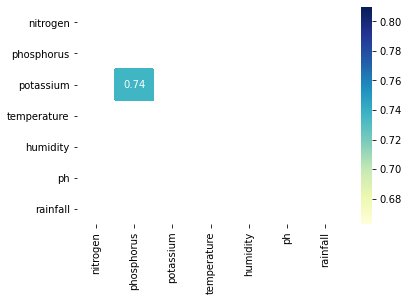

In [100]:
plot_corr(corr)

#### Feature_Selection

In [89]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [106]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X, Y)

SelectKBest(k='all')

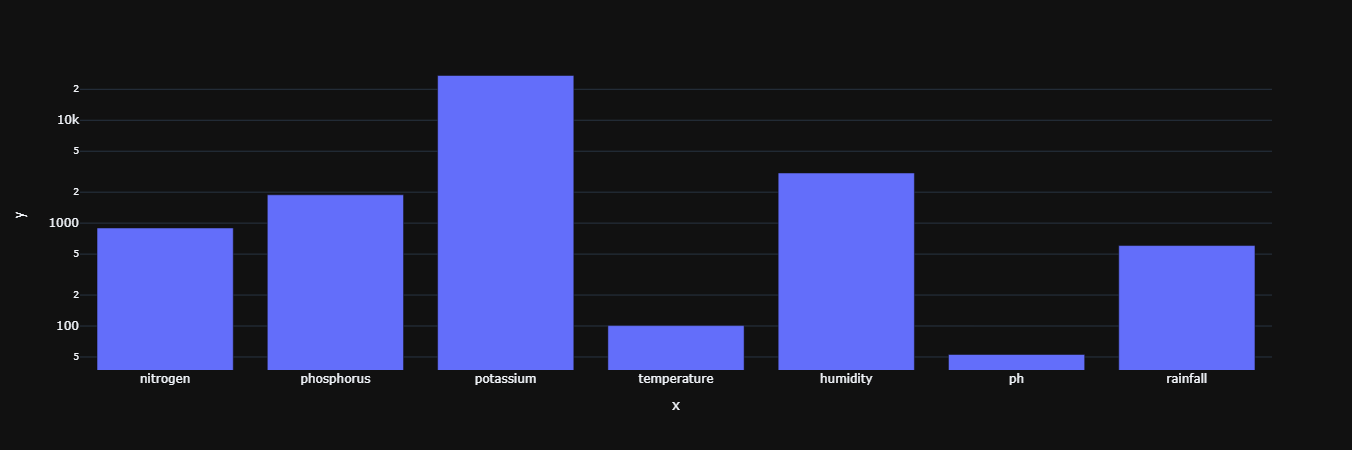

In [108]:
fig = px.bar(x = X.columns, y =fs.scores_, template = 'plotly_dark',log_y=True)  ## Log-Graph
fig.show()

In [101]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 0)

### Models

In [109]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
from sklearn.metrics import classification_report,hamming_loss,roc_auc_score,confusion_matrix

In [119]:
def base_estimator(x_train, x_test, y_train, y_test,est = LogisticRegression):
#     x_train, x_test, y_train, y_test = train_test_split(data_X,data_Y,random_state = 0)
    
    if est == LogisticRegression:
        mod = est(random_state=0, multi_class = 'ovr', max_iter = 200)
        mod.fit(x_train.values, y_train.values)
    
    else:    
        mod = est(random_state=0)
        mod.fit(x_train.values, y_train.values)

    y_train_predict = mod.predict(x_train)
    y_test_predict = mod.predict(x_test)
    
    print(classification_report(y_train,y_train_predict))
    
    print('-'*50)
    print(classification_report(y_test,y_test_predict))
    

In [120]:
base_estimator(x_train, x_test, y_train, y_test, LogisticRegression )

              precision    recall  f1-score   support

           0       0.80      0.97      0.88        71
           1       0.99      0.97      0.98        78
           2       1.00      1.00      1.00        72
           3       1.00      1.00      1.00        77
           4       0.97      0.95      0.96        73
           5       0.94      0.96      0.95        71
           6       0.99      0.99      0.99        73
           7       0.95      0.99      0.97        74
           8       0.99      0.94      0.96        83
           9       1.00      0.94      0.97        72
          10       1.00      1.00      1.00        76
          11       1.00      1.00      1.00        76
          12       1.00      1.00      1.00        76
          13       1.00      1.00      1.00        76
          14       1.00      1.00      1.00        73
          15       1.00      1.00      1.00        76
          16       1.00      1.00      1.00        73
          17       0.99    

In [122]:
base_estimator(x_train, x_test, y_train, y_test, RandomForestClassifier )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        78
           2       1.00      1.00      1.00        72
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00        73
           5       1.00      1.00      1.00        71
           6       1.00      1.00      1.00        73
           7       1.00      1.00      1.00        74
           8       1.00      1.00      1.00        83
           9       1.00      1.00      1.00        72
          10       1.00      1.00      1.00        76
          11       1.00      1.00      1.00        76
          12       1.00      1.00      1.00        76
          13       1.00      1.00      1.00        76
          14       1.00      1.00      1.00        73
          15       1.00      1.00      1.00        76
          16       1.00      1.00      1.00        73
          17       1.00    

In [124]:
base_estimator(x_train, x_test, y_train, y_test, DecisionTreeClassifier )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        78
           2       1.00      1.00      1.00        72
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00        73
           5       1.00      1.00      1.00        71
           6       1.00      1.00      1.00        73
           7       1.00      1.00      1.00        74
           8       1.00      1.00      1.00        83
           9       1.00      1.00      1.00        72
          10       1.00      1.00      1.00        76
          11       1.00      1.00      1.00        76
          12       1.00      1.00      1.00        76
          13       1.00      1.00      1.00        76
          14       1.00      1.00      1.00        73
          15       1.00      1.00      1.00        76
          16       1.00      1.00      1.00        73
          17       1.00    

In [127]:
model = LogisticRegression(random_state=0,n_jobs=-1, multi_class='ovr', max_iter=200)
model.fit(x_train, y_train)

LogisticRegression(max_iter=200, multi_class='ovr', n_jobs=-1, random_state=0)

In [261]:
y_predict_logit = model.predict(x_test)
print(classification_report(y_test,y_predict_logit,target_names = label_map.keys() ))

              precision    recall  f1-score   support

        rice       0.90      0.90      0.90        29
       maize       0.88      1.00      0.94        22
    chickpea       1.00      1.00      1.00        28
 kidneybeans       1.00      1.00      1.00        23
  pigeonpeas       0.89      0.89      0.89        27
   mothbeans       0.96      0.83      0.89        29
    mungbean       1.00      1.00      1.00        27
   blackgram       0.90      1.00      0.95        26
      lentil       1.00      0.88      0.94        17
 pomegranate       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        24
       mango       1.00      1.00      1.00        24
      grapes       1.00      1.00      1.00        24
  watermelon       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        27
       apple       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        27
      papaya       0.93    

In [262]:
### params Checking

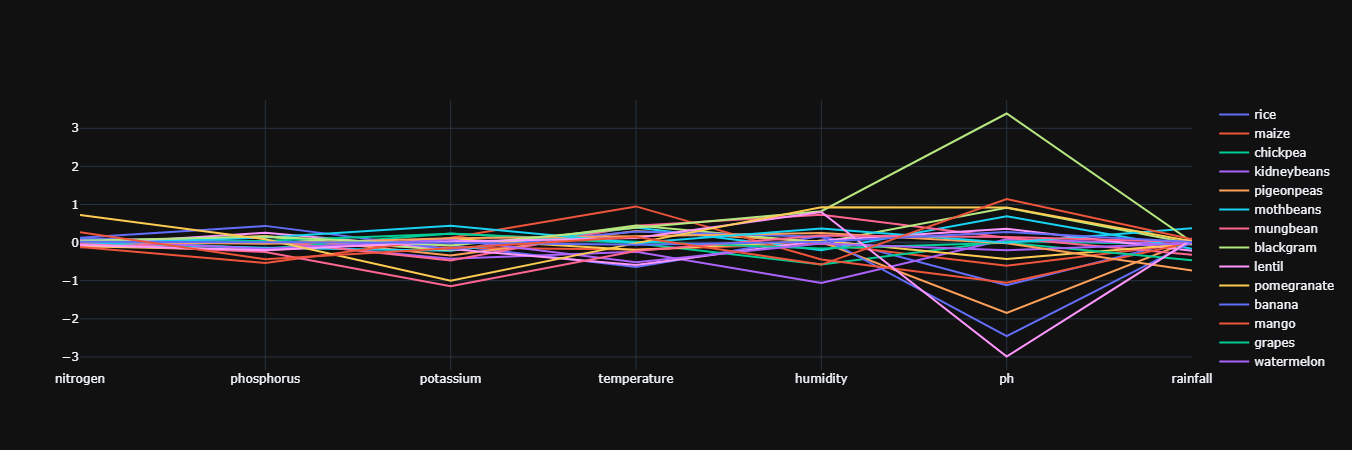

In [251]:
df_coeff = pd.DataFrame(model.coef_, columns = X.columns, index = label_map.keys())
# df_coeff['intercept'] = model.intercept_ # uncomment to use intercept also

fig = go.Figure()
cols = df_coeff.columns
for index in df_coeff.index:
    fig.add_trace(go.Scatter(y = df_coeff.loc[index,:].values, x = cols,
                    mode='lines',
                    name= index))
fig.update_layout(template = 'plotly_dark')
fig.show()

In [234]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive

lab = data['label'].unique()
labels = X.columns
def plot_tree(crit, split, depth, min_split, min_leaf=1):
    estimator = DecisionTreeClassifier(random_state = 0 
          , criterion = crit
          , splitter = split
          , max_depth = depth
          , min_samples_split=min_split
          , min_samples_leaf=min_leaf)
    estimator.fit(X, Y)
    graph = Source(tree.export_graphviz(estimator
          , out_file=None
          , feature_names=labels
          , class_names=lab
          , filled = True))

    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[None, 1,2,3,4]
   , min_split=[2,1.0,0.5,0.1]
   , min_leaf=[1,2,0.1,0.5,])
display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…